<a href="https://www.kaggle.com/code/fernandomazzoni/titanic-1st-competition-submission?scriptVersionId=101427826" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


This is a practice run in terms of my understanding of how to submit to a Kaggle competitions.

The analysis here likely could be expanded upon and further organized for a fuller in depth analysis. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
prefix = "/kaggle/input/titanic/"
train = pd.read_csv(prefix + "train.csv")
test = pd.read_csv(prefix + "test.csv")


train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# Nothing else seems out of the ordinary probably just replace with median fare price
test[test['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


# Numerical columns Analysis

Will have to deal with Age and Cabin in more interesting manners potentially
Embarked and Sex have few unique values relative to total number of values may be useful to OHE them.

General Observations: 

All the categorical information may contain relevant info to predict survivability however, will need some more fine tuning.

Hypothesis: 
- Cabin/Ticket/Embarked categories could correlate with location on ship during the crash
  
- Name/Sex categories could determine survivability based on societal tendencies on who to save. 
    Name could be split and or grouped by desired prefix (Mr., Mrs, Doc., Rev.) or by similarity of name.
    Going by similarity of name could skew results interestingly... (family names and families sticking together)


In [8]:
# We will separate by the initial numerical and categorical columns first for comparison

columns_missing_values = ['Age', 'Cabin']
num_columns = [ x  for x in train.columns if train[x].dtype != object and x != 'Survived']
cat_columns = [ x  for x in train.columns if train[x].dtype == object]
num_columns += ['Survived']
cat_columns += ['Survived']

print("Numerical Columns:")
[print(x) for x in num_columns]
print()
print("Categorical Columns:")
x = [print(x) for x in cat_columns]


Numerical Columns:
PassengerId
Pclass
Age
SibSp
Parch
Fare
Survived

Categorical Columns:
Name
Sex
Ticket
Cabin
Embarked
Survived


# Looking at Numerical features

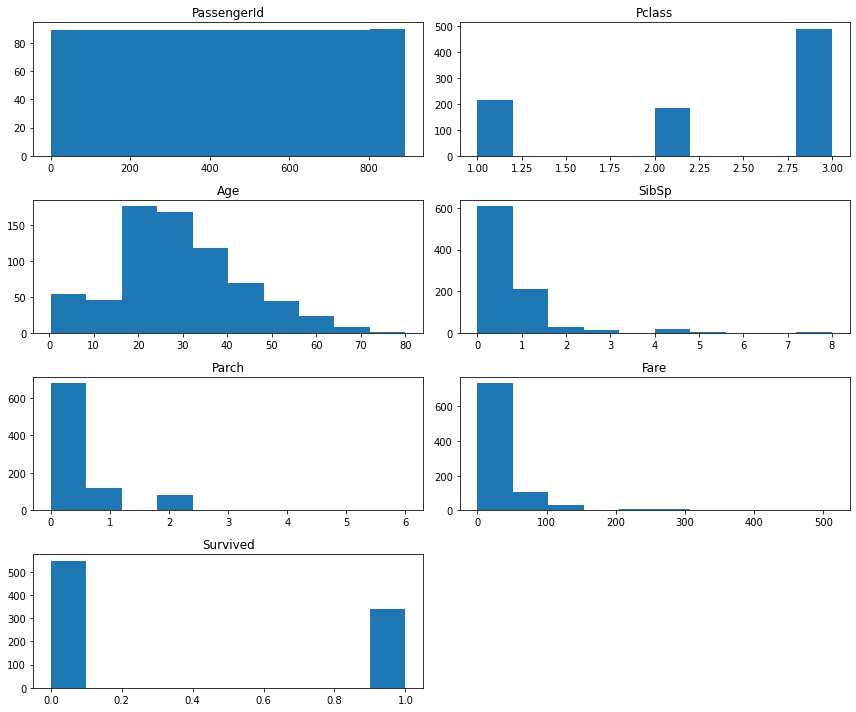

In [9]:
# Generating Histograms for numeric columns
fig, axs = plt.subplots(4,2,figsize=(12,10))

for ax, column in zip(axs.flatten(), num_columns):
    ax.hist(train[column],bins=10, )
    ax.set_title(column)

axs.flatten()[-1].set_visible(False)
plt.tight_layout()
plt.show()

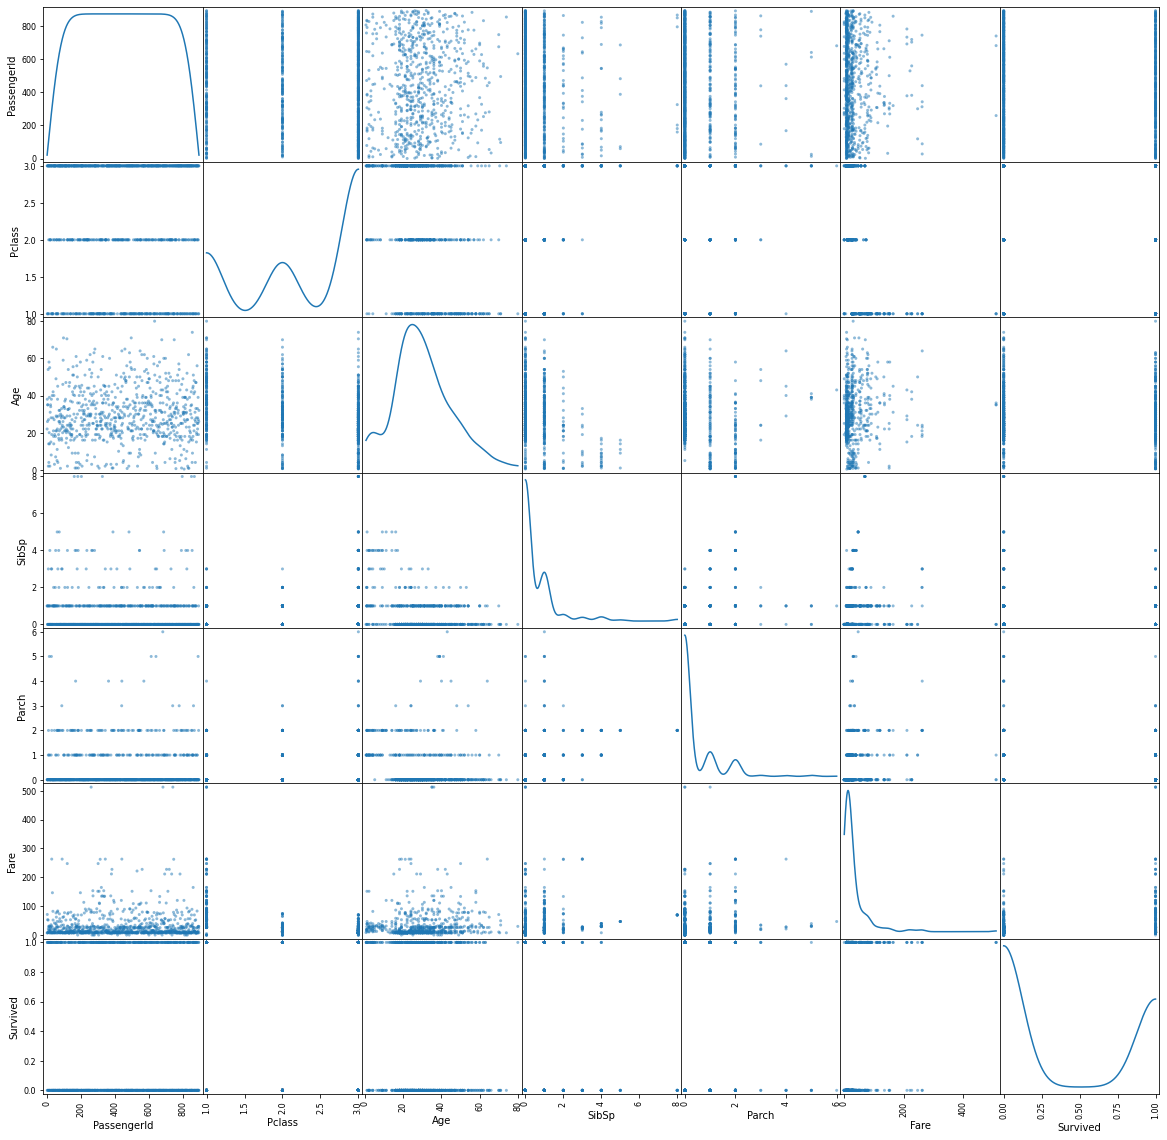

In [10]:
fig, axs = plt.subplots(len(num_columns), len(num_columns), figsize = (20,20))
axs = pd.plotting.scatter_matrix(train[num_columns], ax = axs, diagonal = 'kde')

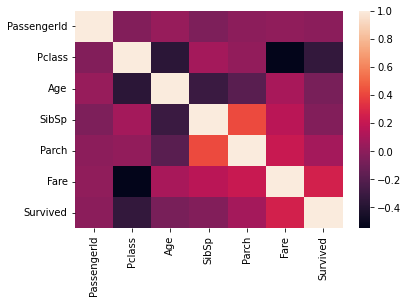

In [11]:
sns.heatmap(train[num_columns].corr())
plt.show()

In [12]:
train[num_columns].pivot_table(index='Survived')

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


In [13]:
cols = ['Pclass', 'Sex', 'Embarked', ]

for col in cols:
    print(train.pivot_table(index='Survived', columns=col, values= 'PassengerId', aggfunc="count"))
    print()

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



# Feature Engineering

Will have to deal with Age and Cabin in more interesting manners potentially
Embarked and Sex have few unique values relative to total number of values may be useful to OHE them.

General Observations: 

All the categorical information may contain relevant info to predict survivability however, will need some more fine tuning.

Hypothesis: 
- Cabin/Ticket/Embarked categories could correlate with location on ship during the crash
  
- Name/Sex categories could determine survivability based on societal tendencies on who to save. 
    Name could be split and or grouped by desired prefix (Mr., Mrs, Doc., Rev.) or by similarity of name.
    Going by similarity of name could skew results interestingly... (family names and families sticking together)


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# Since age and survivability had only a slight correlation I impute the Nan age data by replacing with the mean
def ImputeAge(df):
    train.loc[train.Age.isna(), 'Age'] = np.round(df.Age.mean(), decimals = 1)
    return df


train = ImputeAge(train)

In [16]:
cabins = np.unique(train.Cabin[~train.Cabin.isna()]) # 147 unique Cabins
cabins

array(['A10', 'A14', 'A16', 'A19', 'A20', 'A23', 'A24', 'A26', 'A31',
       'A32', 'A34', 'A36', 'A5', 'A6', 'A7', 'B101', 'B102', 'B18',
       'B19', 'B20', 'B22', 'B28', 'B3', 'B30', 'B35', 'B37', 'B38',
       'B39', 'B4', 'B41', 'B42', 'B49', 'B5', 'B50', 'B51 B53 B55',
       'B57 B59 B63 B66', 'B58 B60', 'B69', 'B71', 'B73', 'B77', 'B78',
       'B79', 'B80', 'B82 B84', 'B86', 'B94', 'B96 B98', 'C101', 'C103',
       'C104', 'C106', 'C110', 'C111', 'C118', 'C123', 'C124', 'C125',
       'C126', 'C128', 'C148', 'C2', 'C22 C26', 'C23 C25 C27', 'C30',
       'C32', 'C45', 'C46', 'C47', 'C49', 'C50', 'C52', 'C54', 'C62 C64',
       'C65', 'C68', 'C7', 'C70', 'C78', 'C82', 'C83', 'C85', 'C86',
       'C87', 'C90', 'C91', 'C92', 'C93', 'C95', 'C99', 'D', 'D10 D12',
       'D11', 'D15', 'D17', 'D19', 'D20', 'D21', 'D26', 'D28', 'D30',
       'D33', 'D35', 'D36', 'D37', 'D45', 'D46', 'D47', 'D48', 'D49',
       'D50', 'D56', 'D6', 'D7', 'D9', 'E10', 'E101', 'E12', 'E121',
       'E17',

Seems like there are only A-T letter cabins 
Assuming this is the same for the test dataset I decide create a new column based off cabin letter


In [17]:
cabin_letters = ['A','B', 'C', 'D', 'E', 'F', 'G', 'T']

# cabin_numbers = np.unique([np.int32(x[0]) for x in [("".join([elem for elem in cab if elem.isdigit() or elem == " "])).split(" ") for cab in cabins] if x[0].isdigit()])
cabin_numbers = np.arange(151)

Used a helper function which checks to make sure 

In [18]:
def check_cabin(cabin):
    l = [letter for letter in cabin_letters if letter in cabin][-1]
    numbers = [number for number in cabin_numbers if str(number) in cabin]
    if len(numbers)>0:
        n = [number for number in cabin_numbers if str(number) in cabin][-1]
        return l, n
    else:
        return l, -1


def create_cabin_columns(df):

    temp_df = df.Cabin[~df.Cabin.isna()].apply(lambda x: check_cabin(x)).to_frame("Tuple")

    df.loc[~df.Cabin.isna(), 'Cabin_Letter'], df.loc[~df.Cabin.isna(), 'Cabin_Number'] = zip(*temp_df['Tuple'])

    # We create a new class of the passengers without a cabin number or cabin number
    df.loc[df.Cabin.isna(), 'Cabin_Letter'] = 'n'
    df.loc[df.Cabin.isna(), 'Cabin_Number'] = -1

    return df

train = create_cabin_columns(train)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,-1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,-1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,n,-1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,NaN,S,n,-1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148.0


# Name and ticket are next on the chopping block

## Name Analysis

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Cabin_Letter  891 non-null    object 
 13  Cabin_Number  891 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [20]:
df = train.copy() # Change this to test to see Titles for test set.

last_names = [ name.split(',')[0] for name in df.Name.values]

prefix_names = [ name.split(',')[1] for name in df.Name.values]


titles = [prefix_name.split('.')[0] for prefix_name in prefix_names]
uni_titles, count_titles = np.unique(titles, return_counts=True)

a = [print(uni_titles[i], count_titles[i]) for i in range(len(uni_titles))]

 Capt 1
 Col 2
 Don 1
 Dr 7
 Jonkheer 1
 Lady 1
 Major 2
 Master 40
 Miss 182
 Mlle 2
 Mme 1
 Mr 517
 Mrs 125
 Ms 1
 Rev 6
 Sir 1
 the Countess 1


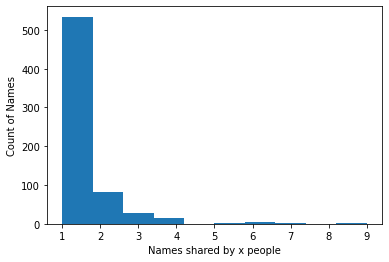

In [21]:
uni_lnames, count_lnames = np.unique(last_names, return_counts=True)

plt.hist(count_lnames)
plt.xlabel("Names shared by x people")
plt.ylabel('Count of Names')
plt.show()

In [22]:
print("# of Different Last Names", len(count_lnames))
sorted(zip(count_lnames, uni_lnames), reverse=True)

# of Different Last Names 667


[(9, 'Andersson'),
 (7, 'Sage'),
 (6, 'Skoog'),
 (6, 'Panula'),
 (6, 'Johnson'),
 (6, 'Goodwin'),
 (6, 'Carter'),
 (5, 'Rice'),
 (4, 'Williams'),
 (4, 'Smith'),
 (4, 'Palsson'),
 (4, 'Lefebre'),
 (4, 'Kelly'),
 (4, 'Hart'),
 (4, 'Harris'),
 (4, 'Harper'),
 (4, 'Gustafsson'),
 (4, 'Fortune'),
 (4, 'Ford'),
 (4, 'Brown'),
 (4, 'Baclini'),
 (4, 'Asplund'),
 (3, 'West'),
 (3, 'Vander Planke'),
 (3, 'Van Impe'),
 (3, 'Thayer'),
 (3, 'Taussig'),
 (3, 'Richards'),
 (3, 'Olsen'),
 (3, "O'Brien"),
 (3, 'Newell'),
 (3, 'Navratil'),
 (3, 'Moran'),
 (3, 'Meyer'),
 (3, 'Laroche'),
 (3, 'Jussila'),
 (3, 'Johansson'),
 (3, 'Jensen'),
 (3, 'Hoyt'),
 (3, 'Hickman'),
 (3, 'Hansen'),
 (3, 'Graham'),
 (3, 'Goldsmith'),
 (3, 'Flynn'),
 (3, 'Elias'),
 (3, 'Davies'),
 (3, 'Collyer'),
 (3, 'Bourke'),
 (3, 'Boulos'),
 (3, 'Allison'),
 (2, 'Zabour'),
 (2, 'Yasbeck'),
 (2, 'Wick'),
 (2, 'White'),
 (2, 'Webber'),
 (2, 'Turpin'),
 (2, 'Thorneycroft'),
 (2, 'Taylor'),
 (2, 'Svensson'),
 (2, 'Strom'),
 (2, 'Stanley'

This is rather unexpected, I thought some names would be shared by more than 9 people. (Like an Alex, Maybe this could be a modern bias of mine)
Nonetheless First Names are typically random at most giving geographical information. 

Hypothesis:
Surnames should correlate certain people with families and/or geographic information and be a better predictor of survivability.

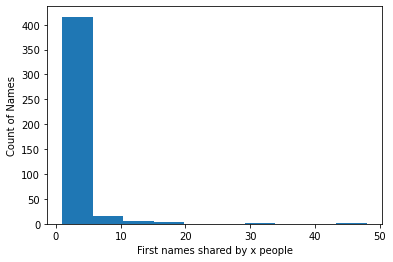

In [23]:
first_names = [prefix.split('.')[1].split(' ')[1] for prefix in prefix_names]
# print(first_names)

uni_fnames, count_fnames = np.unique(first_names, return_counts=True)

plt.hist(count_fnames)
plt.xlabel("First names shared by x people")
plt.ylabel('Count of Names')
plt.show()

In [24]:
print("# of Passengers", len(count_fnames))
sorted(zip(count_fnames, uni_fnames), reverse=True)

# of Passengers 441


[(48, 'William'),
 (31, 'John'),
 (19, 'Thomas'),
 (16, 'George'),
 (16, 'Charles'),
 (15, 'James'),
 (15, 'Henry'),
 (13, 'Frederick'),
 (13, 'Edward'),
 (11, 'Richard'),
 (10, 'Johan'),
 (9, 'Samuel'),
 (9, 'Mary'),
 (9, 'Karl'),
 (9, 'Joseph'),
 (9, 'Anna'),
 (7, 'Arthur'),
 (7, 'Alfred'),
 (7, 'Albert'),
 (6, 'Victor'),
 (6, 'Robert'),
 (6, 'Peter'),
 (6, 'Margaret'),
 (6, 'Ernest'),
 (6, 'Elizabeth'),
 (5, 'Walter'),
 (5, 'Harry'),
 (5, 'Frank'),
 (5, 'Ernst'),
 (5, 'Alice'),
 (5, 'Alexander'),
 (4, 'Sidney'),
 (4, 'Percival'),
 (4, 'Patrick'),
 (4, 'Nils'),
 (4, 'Martin'),
 (4, 'Ivan'),
 (4, 'Helen'),
 (4, 'Hans'),
 (4, 'Ellen'),
 (4, 'David'),
 (4, 'Daniel'),
 (4, 'Bertha'),
 (4, 'Benjamin'),
 (4, 'August'),
 (3, 'Tannous'),
 (3, 'Stephen'),
 (3, 'Rene'),
 (3, 'Reginald'),
 (3, 'Leo'),
 (3, 'Katherine'),
 (3, 'Kate'),
 (3, 'Juha'),
 (3, 'Jean'),
 (3, 'Jakob'),
 (3, 'Hanora'),
 (3, 'Hanna'),
 (3, 'Francis'),
 (3, 'Emil'),
 (3, 'Carl'),
 (3, 'Augusta'),
 (3, 'Annie'),
 (3, 'Anders

I noticed from printing the names there were more traditionally male names. There's probably an underlying reason worth further investigation.
I'll likely ignore first names as it is also in general pretty messy

In [25]:
Full_First_Name = [prefix.split('.')[1].strip() for prefix in prefix_names]

In [26]:
Full_First_Name

['Owen Harris',
 'John Bradley (Florence Briggs Thayer)',
 'Laina',
 'Jacques Heath (Lily May Peel)',
 'William Henry',
 'James',
 'Timothy J',
 'Gosta Leonard',
 'Oscar W (Elisabeth Vilhelmina Berg)',
 'Nicholas (Adele Achem)',
 'Marguerite Rut',
 'Elizabeth',
 'William Henry',
 'Anders Johan',
 'Hulda Amanda Adolfina',
 '(Mary D Kingcome)',
 'Eugene',
 'Charles Eugene',
 'Julius (Emelia Maria Vandemoortele)',
 'Fatima',
 'Joseph J',
 'Lawrence',
 'Anna "Annie"',
 'William Thompson',
 'Torborg Danira',
 'Carl Oscar (Selma Augusta Emilia Johansson)',
 'Farred Chehab',
 'Charles Alexander',
 'Ellen "Nellie"',
 'Lalio',
 'Manuel E',
 'William Augustus (Marie Eugenie)',
 'Mary Agatha',
 'Edward H',
 'Edgar Joseph',
 'Alexander Oskar',
 'Hanna',
 'Ernest Charles',
 'Augusta Maria',
 'Jamila',
 'Johan (Johanna Persdotter Larsson)',
 'William John Robert (Dorothy Ann Wonnacott)',
 'Theodor',
 'Simonne Marie Anne Andree',
 'Margaret Delia',
 'William John',
 'Denis',
 'Bridget',
 'Youssef',
 

In [27]:
np.array(Full_First_Name)[[('(' in prefix) for prefix in Full_First_Name]]

array(['John Bradley (Florence Briggs Thayer)',
       'Jacques Heath (Lily May Peel)',
       'Oscar W (Elisabeth Vilhelmina Berg)', 'Nicholas (Adele Achem)',
       '(Mary D Kingcome)', 'Julius (Emelia Maria Vandemoortele)',
       'Carl Oscar (Selma Augusta Emilia Johansson)',
       'William Augustus (Marie Eugenie)',
       'Johan (Johanna Persdotter Larsson)',
       'William John Robert (Dorothy Ann Wonnacott)',
       'Josef (Josefine Franchi)', 'Henry Sleeper (Myna Haxtun)',
       'Lizzie (Elizabeth Anne Wilkinson)', '(Elizabeth Ramell)',
       'Karl Alfred (Maria Mathilda Gustafsson)',
       'John T (Ada Julia Bone)', 'Pastcho ("Pentcho")',
       'Alexander A (Grace Charity Laury)',
       'Leopold (Mathilde Francoise Pede)', 'Joseph (Sultana)',
       'Pekka Pietari (Elin Matilda Dolck)',
       'August Edvard ("Wennerstrom")', 'Michel ("Louis M Hoffman")',
       'Thomas (Edith Wearne)', 'James (Elizabeth "Bessie" Inglis Milne)',
       '(Edith Martha Bowerman)', 'Willi

Looking at the Names that have '('  I notice that generally a traditionally male name was given first with a traditionally female name in the parenthesis.
Using the first names would likely require further investigation of the data set.

For now I will ignore first names and keep last names and titles as a new column in the dataset

Since titles in training set may not show up in test set and vice versa it may be wiser instead of keeping all sur-title data to replace it with categorize people based on common title vs uncommon title. 
This could be tweaked with another class for professional titles (Dr, Major, Captain). 

For now I'll break it up for common and uncommon titles.
This could be a source for bias in the model as I'm mainly using common titles as an american understands it.
A more in depth analysis could try to determine it in a more precise manner with the context of the titles held during the time period.

In [28]:
def check_title(element):
    common_titles = ['Mr', 'Miss', 'Ms', 'Mrs']
    
    return np.any([title in element for title in common_titles])

In [29]:

def create_title_lastname_columns(df):

    temp_df = df.Name.apply(lambda x: check_title(x)).to_frame("temp")
    df.loc[:, 'Common_Title'] = temp_df['temp']

    df = df.copy() # Change this to test to see Titles for test set.

    last_names = [ name.split(',')[0] for name in df.Name.values]

    df['Last_Name'] = last_names
    
    return df

In [30]:
test = create_title_lastname_columns(train)

In [31]:
test.Common_Title.describe()

count      891
unique       2
top       True
freq       828
Name: Common_Title, dtype: object

In [32]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_Number,Common_Title,Last_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n,-1.0,True,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,85.0,True,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n,-1.0,True,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,123.0,True,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n,-1.0,True,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,n,-1.0,False,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,42.0,True,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,NaN,S,n,-1.0,True,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,148.0,True,Behr


## Ticket Analysis

I split the tickets into its numeric and prefix components as it could contain useful information?

In [33]:
def get_ticket_number(ticket):
    for tick_comp in ticket.split(' '):
        if tick_comp.isnumeric():
            return tick_comp


def get_ticket_prefix(ticket):
    if not ticket.isnumeric():
        return ' '.join([tick_comp for tick_comp in ticket.split(' ') if not tick_comp.isnumeric()])
    else:
        return 'None'

In [34]:
def create_ticket_columns(df):
    temp_df = df.Ticket.apply(lambda x: get_ticket_number(x)).to_frame("temp")
    df.loc[:, 'Ticket_Number'] = temp_df['temp']

    temp_df = df.Ticket.apply(lambda x: get_ticket_prefix(x)).to_frame("temp")
    df.loc[:, 'Ticket_Prefix'] = temp_df['temp']
    return df

In [35]:
temp_df = create_ticket_columns(train)

I notice many of the tickets non-numeric components are similiar to one another and could be grouped into few columns rather than the 45 I currently have. I'll leave this for future improvements

In [36]:
np.unique(temp_df.Ticket_Prefix)

array(['A./5.', 'A.5.', 'A/4', 'A/4.', 'A/5', 'A/5.', 'A/S', 'A4.', 'C',
       'C.A.', 'C.A./SOTON', 'CA', 'CA.', 'F.C.', 'F.C.C.', 'Fa', 'LINE',
       'None', 'P/PP', 'PC', 'PP', 'S.C./A.4.', 'S.C./PARIS', 'S.O./P.P.',
       'S.O.C.', 'S.O.P.', 'S.P.', 'S.W./PP', 'SC', 'SC/AH',
       'SC/AH Basle', 'SC/PARIS', 'SC/Paris', 'SCO/W', 'SO/C',
       'SOTON/O.Q.', 'SOTON/O2', 'SOTON/OQ', 'STON/O 2.', 'STON/O2.',
       'SW/PP', 'W./C.', 'W.E.P.', 'W/C', 'WE/P'], dtype=object)

# Putting it all together

In [37]:
# Functions to Create Useful Columns
def ImputeAge(df):
    df.loc[df.Age.isna(), 'Age'] = np.round(df.Age.mean(), decimals = 1)
    return df

def ImputeFare(df):
    df.loc[df.Fare.isna(), 'Fare'] = np.round(df.Fare.mean(), decimals = 1)
    return df

def check_cabin(cabin):
    cabin_letters = ['A','B', 'C', 'D', 'E', 'F', 'G', 'T'] # This is specific to titanic dataset
    cabin_numbers = np.arange(151) # This is specific to titanic dataset

    l = [letter for letter in cabin_letters if letter in cabin][-1]
    numbers = [number for number in cabin_numbers if str(number) in cabin]
    if len(numbers)>0:
        n = [number for number in cabin_numbers if str(number) in cabin][-1]
        return l, n
    else:
        return l, np.nan


def create_cabin_columns(df):

    temp_df = df.Cabin[~df.Cabin.isna()].apply(lambda x: check_cabin(x)).to_frame("Tuple")

    df.loc[~df.Cabin.isna(), 'Cabin_Letter'], df.loc[~df.Cabin.isna(), 'Cabin_Number'] = zip(*temp_df['Tuple'])

    # # We create a new class of the passengers without a cabin number or cabin number
    df.loc[df.Cabin.isna(), 'Cabin_Letter'] = None
    # df.loc[df.Cabin.isna(), 'Cabin_Number'] = np.nan

    return df



def check_title(element):
    common_titles = ['Mr', 'Miss', 'Ms', 'Mrs']
    
    return np.any([title in element for title in common_titles])


def create_title_lastname_columns(df):

    temp_df = df.Name.apply(lambda x: check_title(x)).to_frame("temp")
    df.loc[:, 'Common_Title'] = temp_df['temp']

    df = df.copy() # Change this to test to see Titles for test set.

    last_names = [ name.split(',')[0] for name in df.Name.values]

    df['Last_Name'] = last_names
    
    return df



def get_ticket_number(ticket):
    for tick_comp in ticket.split(' '):
        if tick_comp.isnumeric():
            return np.int32(tick_comp)

def get_ticket_prefix(ticket):
    if not ticket.isnumeric():
        return ' '.join([tick_comp for tick_comp in ticket.split(' ') if not tick_comp.isnumeric()])

        
def create_ticket_columns(df):
    temp_df = df.Ticket.apply(lambda x: get_ticket_number(x)).to_frame("temp")
    df.loc[:, 'Ticket_Number'] = temp_df['temp']

    df.loc[df.Ticket_Number.isna(), 'Ticket_Number'] = np.int32(df.Ticket_Number.mean())


    temp_df = df.Ticket.apply(lambda x: get_ticket_prefix(x)).to_frame("temp")
    df.loc[:, 'Ticket_Prefix'] = temp_df['temp']
    return df



def create_useful_columns(df, return_labels = False):
    df = ImputeAge(df)
    df = ImputeFare(df)
    df = create_cabin_columns(df)
    df = create_title_lastname_columns(df)
    df = create_ticket_columns(df)
    # Only keeping relevant columns
    df = df.drop(index = df[df.Embarked.isna()].index) # Dropping Embarked Nan values
    df.Sex = df.Sex.apply(lambda x: 0 if x == 'male' else 1)


    
    if return_labels == True:
        labels = df.Survived
        df = df.loc[:, ['Common_Title', 'Last_Name', 'Sex', 'Age', 'Ticket_Number', 'Cabin_Letter', 'Cabin_Number', 'Fare', 'Embarked', 'Pclass', 'SibSp', 'Parch']]
        return df, labels

    else:
        df = df.loc[:, ['PassengerId','Common_Title', 'Last_Name' ,'Sex', 'Age', 'Ticket_Number', 'Cabin_Letter', 'Cabin_Number', 'Fare', 'Embarked', 'Pclass', 'SibSp', 'Parch']]
        return df





In [38]:
prefix = "/kaggle/input/titanic/"
train = pd.read_csv(prefix + "train.csv")
test = pd.read_csv(prefix + "test.csv")


train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Building Models

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

In [41]:
train_df, train_labels = create_useful_columns(train.copy(), return_labels=True)
test_df = create_useful_columns(test.copy())



# Binning Cabin Number to 10 Categories and Label Encoding as ordering likely matters
train_df.Cabin_Number, bins = pd.cut(train_df.Cabin_Number, 10, retbins=True)
test_df.Cabin_Number= pd.cut(test_df.Cabin_Number, bins =bins)

label_encoder = LabelEncoder()
train_df.Cabin_Number = label_encoder.fit_transform(train_df.Cabin_Number)
test_df.Cabin_Number = label_encoder.transform(test_df.Cabin_Number)


label_encoder = LabelEncoder()
train_df.Cabin_Letter = label_encoder.fit_transform(train_df.Cabin_Letter)
test_df.Cabin_Letter = label_encoder.transform(test_df.Cabin_Letter)

# Target Encoding Last Name with Age
# Will essentially place the mean age by last name for each last name
# trials

# Target Encoding Last Name with Age
# Will essentially place the mean age by last name for each last name
# 

target_encoder = TargetEncoder(smoothing=0.0, min_samples_leaf=0)

# This isn't best practice, grouping Train-Test data here could be data leakage
# The reason why its not should be similiar to Label Encoded example, I'm essentially just renaming the data with average age as a weight. 
target_encoder.fit( pd.concat([train_df.Last_Name, test_df.Last_Name]), pd.concat([train_df.Age, test_df.Age]))
train_df['Last_Name'] = target_encoder.transform(train_df.Last_Name)
test_df['Last_Name'] = target_encoder.transform(test_df.Last_Name)

# train_df['Last_Name'] = target_encoder.fit_transform(train_df.Last_Name, train_df.Age)
# test_df['Last_Name'] = target_encoder.transform(test_df.Last_Name)



train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [42]:
X = train_df.values.copy()
y = train_labels.copy()
X_train, X_validation, Y_train, Y_validation = train_test_split(X,y, test_size = .1, random_state = 2516, shuffle=True )

In [43]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_validation = sc.transform (X_validation)
passengerId = test_df.iloc[:, :1]
test_df = sc.transform(test_df.iloc[:, 1:])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [44]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_validation)
acc_log = round(logreg.score(X_validation, Y_validation) * 100, 2)
acc_log

83.15

In [45]:
coeff_df = pd.DataFrame(train_df.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)



,Feature,Correlation
2,Sex,1.442334
4,Ticket_Number,0.138615
11,Embarked_C,0.131813
5,Cabin_Letter,0.114159
1,Last_Name,0.113751
7,Fare,0.056193
12,Embarked_Q,-0.051372
13,Embarked_S,-0.084259
10,Parch,-0.118794
3,Age,-0.389740


In [46]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_validation)
acc_svc = round(svc.score(X_validation, Y_validation) * 100, 2)
acc_svc



83.15

In [47]:
# K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_validation)
acc_knn = round(knn.score(X_validation, Y_validation) * 100, 2)
acc_knn

84.27

In [48]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_validation)
acc_gaussian = round(gaussian.score(X_validation, Y_validation) * 100, 2)
acc_gaussian

75.28

In [49]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_validation)
acc_sgd = round(sgd.score(X_validation, Y_validation) * 100, 2)
acc_sgd

74.16

In [50]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_validation)
acc_decision_tree = round(decision_tree.score(X_validation, Y_validation) * 100, 2)
acc_decision_tree


77.53

In [51]:
 # Random Forest

random_forest = RandomForestClassifier(n_estimators=150)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_validation)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_validation, Y_validation) * 100, 2)
acc_random_forest

86.52

In [52]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',  'Support Vector Machines', 'KNN', 
              'Naive Bayes', 'Stochastic Gradient Decent', 'Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_svc, acc_knn,  
            acc_gaussian, acc_sgd, acc_decision_tree, acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,Random Forest,86.52
2,KNN,84.27
0,Logistic Regression,83.15
1,Support Vector Machines,83.15
5,Decision Tree,77.53
3,Naive Bayes,75.28
4,Stochastic Gradient Decent,74.16


In [53]:
# Final Prediction

Y_pred = random_forest.predict(test_df)

submission = pd.DataFrame({
        "PassengerId": passengerId.values.flatten(),
        "Survived": Y_pred
    })

In [54]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
submission.to_csv('submission.csv', index=False)

In [56]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [57]:
os.listdir()

['submission.csv', '__notebook__.ipynb']